## PROGETTO DATA MINING 

*Introduction and data semantics*

The possibility to predict future changes is a key aspect in the economy. Predictions can help a company to make the right choice minimizing cost or maximizing profit. This is the goal of Carvana, a start-up business launched by an American company. The company is an online used car retailer and it aim to predict if a car was a bad buy or not to prevent kiked back vehicles. To reach this goal Carvana published a dataset that contains 58,386 instances, with 32 independent variables and a dependent variable (IsBadBuy). Another dataset of 13,597 instances is also set aside for testing. In the text that explain the meaning of all the variables there are two more variables (AcquisitionType and KickDate) that aren't present in the dataset. The following table shows some information about the attributes.

In [4]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from collections import defaultdict
from scipy.stats.stats import pearsonr

df = pd.read_csv('training.csv') 
df.head()
#df.dtype
#df.isnull().any()
df.info()
#df.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58386 entries, 0 to 58385
Data columns (total 34 columns):
RefId                                58386 non-null int64
IsBadBuy                             58386 non-null int64
PurchDate                            58386 non-null object
Auction                              58386 non-null object
VehYear                              58386 non-null int64
VehicleAge                           58386 non-null int64
Make                                 58386 non-null object
Model                                58386 non-null object
Trim                                 56475 non-null object
SubModel                             58379 non-null object
Color                                58379 non-null object
Transmission                         58378 non-null object
WheelTypeID                          55813 non-null float64
WheelType                            55809 non-null object
VehOdo                               58386 non-null int64
Nationalit

The dataset has 15 variables that are rapresented by categorical attributes, 19 numerical variables 9 of them are represent by integer values and the remaining 10 are float.
Each record has a unique RefID assigned as an identifier. The feature called “purchDate” describes the date, month and year the vehicle was purchased. “VehYear” describes the year when the vehicle was made. From the above these two features, we get “VehicleAge” which indicates the age of the vehicle. ( PurchDate (YEAR)  = VehYear + VehicleAge -> Quindi direi di togliere VehYear che si può ricavare dalle altre due!).. 
The categorical attributes “Auction”, "VNST" and "IsOnlineSale" show names of the auctions where every car was purchased, in which countries these vehicles were purchased and in the sale was online or not.
The features “Make”, “TopThreeAmericanName” and “Nationality” give informations about the manufacturers and their countries of origin. Instead "Model", "SubModel" and "Size" define the kind of cars that are selled. Other variables like "Color", "Transmission", "Trim", "VehOdo", "WheelType" display instructions about technical and mechanical characteristics. 
In the dataset there are a lot of informations about the retail and the auction price, or even about the warranty with the variables "MMRAcquisitionAuctionAveragePrice", "MMRAcquisitionAuctionCleanPrice", "MMRAcquisitionRetailAveragePrice", "MMRAcquisitonRetailCleanPrice", "MMRCurrentAuctionAveragePrice", "MMRCurrentAuctionCleanPrice", "MMRCurrentRetailAveragePrice", "MMRCurrentRetailCleanPrice", "VehBCost", "WarrantyCost". "Acquisition" means the price of the vehicle MMR at which it was sold at auction. "Clean" refers to the price of the vehicle in good condition. These vehicles are
usually more expensive than the ones with “Average”. "Auction" refers to the expected price of the vehicle at the auction "Retail" refers to the expected price of the vehicle to which the customer is willing to pay at the dealership.
Some variables like "RefID", "WheelTypeID", "BYRNO", "VNZIP" were deleted from the dataset because their attributes were just  unique numbers to identify respectively vehicles, wheels, buyers and zipcode, so their contents weren't important for the analysis.  
A fondamental aspect of the analysis is checking if there are some missing values. In the figure below there are the numebers of missing values for each attributes.


In [5]:
df.isnull().sum()

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  1911
SubModel                                 7
Color                                    7
Transmission                             8
WheelTypeID                           2573
WheelType                             2577
VehOdo                                   0
Nationality                              4
Size                                     4
TopThreeAmericanName                     4
MMRAcquisitionAuctionAveragePrice       13
MMRAcquisitionAuctionCleanPrice         13
MMRAcquisitionRetailAveragePrice        13
MMRAcquisitonRetailCleanPrice           13
MMRCurrentAuctionAveragePrice          245
MMRCurrentA

Other important information can be obtained by the following table.
parlare is bad buy.

In [6]:
df.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,58386.000000,58386.000000,58386.000000,58386.000000,55813.000000,58386.000000,58373.000000,58373.000000,58373.000000,58373.000000,58141.000000,58141.000000,58141.000000,58141.000000,58386.000000,58386.000000,58386.000000,58386.000000,58386.000000
mean,36567.888449,0.123454,2005.344637,4.174956,1.495566,71478.090518,6128.127953,7372.912699,8497.288558,9851.768061,6131.666655,7389.958652,8776.065118,10145.227034,26359.191519,58125.258195,6730.008335,0.025674,1276.105042
std,21092.254801,0.328961,1.733307,1.713833,0.520802,14591.224550,2456.632611,2715.506462,3151.106237,3378.839613,2432.171539,2682.310828,3086.373733,3304.637060,25804.795573,26146.806098,1762.075265,0.158162,598.885423
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18270.250000,0.000000,2004.000000,3.000000,1.000000,61785.000000,4273.000000,5409.000000,6279.000000,7501.000000,4275.000000,5415.000000,6538.000000,7788.000000,17212.000000,32124.000000,5430.000000,0.000000,837.000000
50%,36608.500000,0.000000,2005.000000,4.000000,1.000000,73359.000000,6097.000000,7308.000000,8448.000000,9798.000000,6063.000000,7311.000000,8733.000000,10103.000000,19662.000000,74135.000000,6700.000000,0.000000,1155.000000
75%,54811.500000,0.000000,2007.000000,5.000000,2.000000,82427.000000,7765.000000,9017.000000,10652.000000,12084.000000,7737.000000,9014.000000,10910.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,36485.000000,1.000000,7498.000000


*Distribution of the variables and statistics* 

The following summary table show some graphs useful to understand the distributions of the variables.

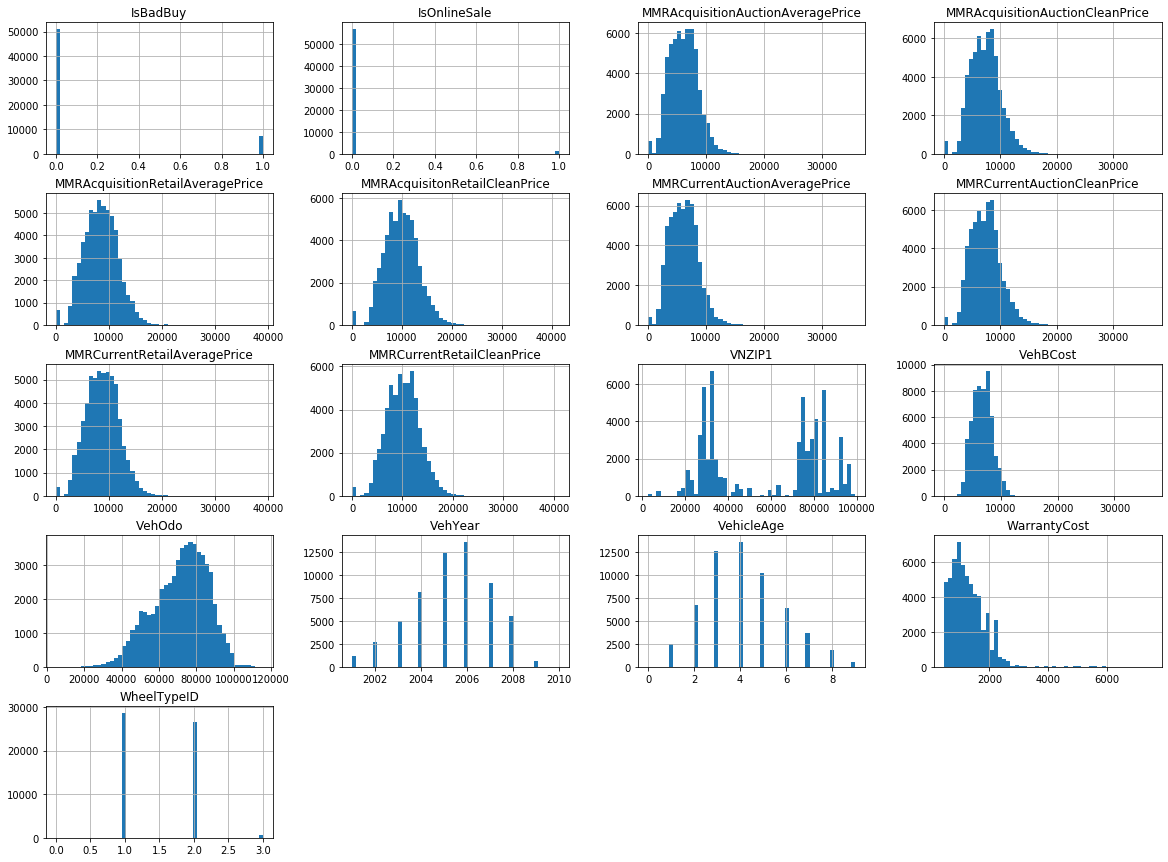

In [7]:
df1=df
df1 = df.drop(['RefId', 'BYRNO'], axis=1)
df1.hist(bins=50, figsize=(20,15))
plt.show()

Focusing on the following graph we can see that most of all the purchases are good buys, to specify the bad buys are only the %% respect the total of the purchased cars.

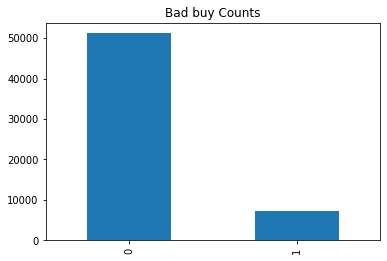

In [8]:
df['IsBadBuy'].value_counts().plot(kind='bar', 
                                   title='Bad buy Counts')
plt.show()

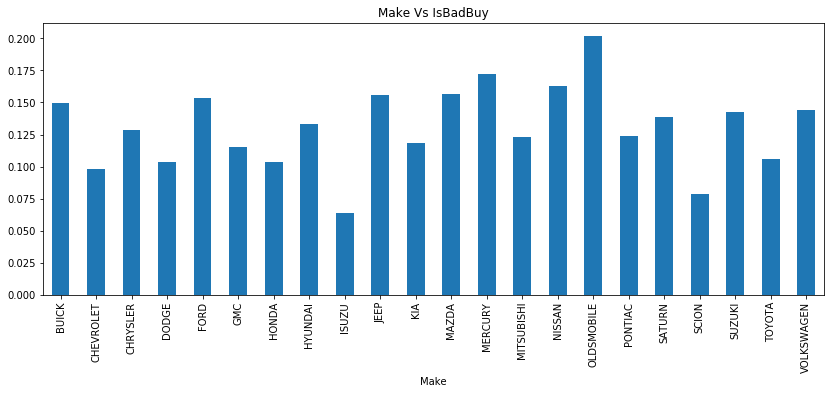

In [9]:
#Percentuale di IsBadBuy divisi per Make
df.groupby('Make').agg([np.mean,np.size])['IsBadBuy'].query('size > 100')['mean'].plot.bar(figsize=(14,5), title = "Make Vs IsBadBuy")
plt.show()

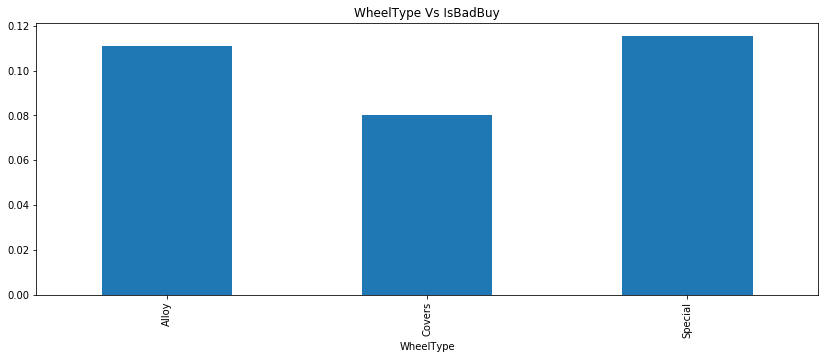

In [10]:
#Percentuale di IsBadBuy divisi per WheelType
df.groupby('WheelType').agg([np.mean,np.size])['IsBadBuy'].query('size > 100')['mean'].plot.bar(figsize=(14,5), title = "WheelType Vs IsBadBuy")
plt.show()

The auction Manheim sold most of the cars, 

Text(0, 0.5, 'Count')

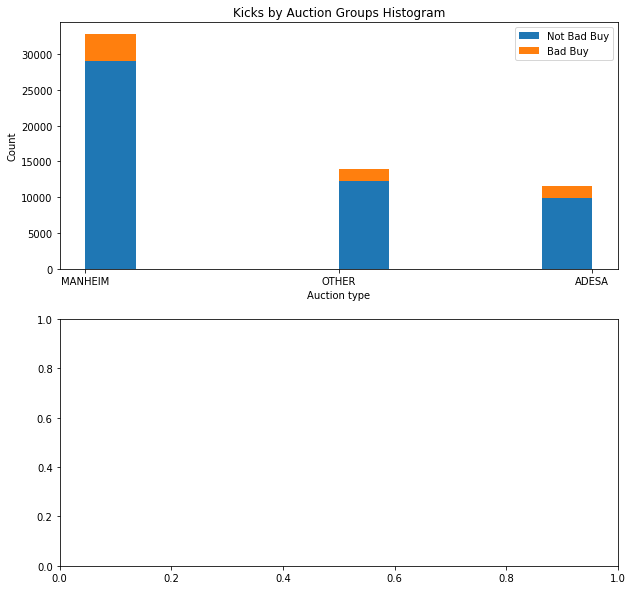

In [11]:
#Percentuale di IsBadBuy divisi per Auction
fig, axes = plt.subplots(2, 1, figsize=(10,10))
df1 = df[df['IsBadBuy'] == 0]['Auction']
df2 = df[df['IsBadBuy'] == 1]['Auction']
axes[0].hist([df1, df2], stacked=True) #,stacked=True
axes[0].legend(('Not Bad Buy', 'Bad Buy'), loc='best')
axes[0].set_title('Kicks by Auction Groups Histogram')
axes[0].set_xlabel('Auction type')
axes[0].set_ylabel('Count')

As expected, the oldest cars are the ones with the highest number of bad buys 

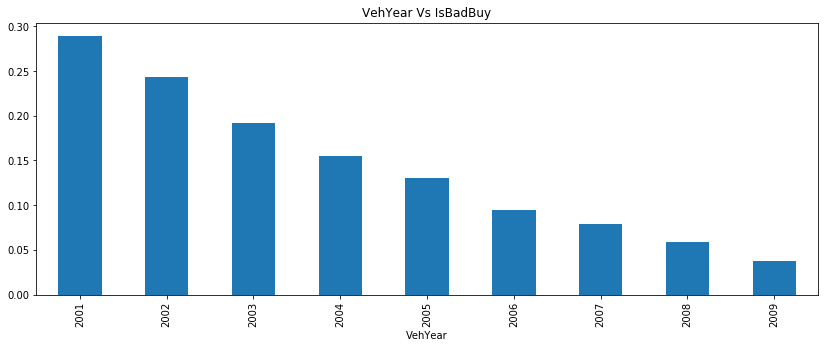

In [12]:
df.groupby('VehYear').agg([np.mean,np.size])['IsBadBuy'].query('size > 100')['mean'].plot.bar(figsize=(14,5), title = "VehYear Vs IsBadBuy")
plt.show()

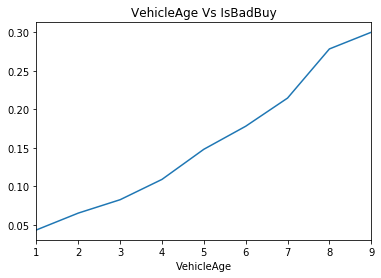

In [13]:
#Grafico che fa vedere come più è alto VehicleAge più è alta la percentuale di isBadBuy
df.groupby('VehicleAge').agg([np.mean,np.size])['IsBadBuy'].query('size > 100')['mean'].plot(title = "VehicleAge Vs IsBadBuy")
plt.show()

MISSING VALUES

Before using algorithms to analize the data, we fixed the missing value in the dataset.
For example in the variable 'TopThreeAmericanName' there are 4 attributes that are missing. 

In [14]:
df[df['TopThreeAmericanName'].isnull()]

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
15769,10897,0,10/19/2009,MANHEIM,2002,7,GMC,SIERRA 1500,SL,BASE,...,NaN,NaN,NaN,NaN,16044,27542,NC,7500.0,0,1455
18532,25187,0,12/10/2009,OTHER,2008,1,DODGE,NITRO 4WD V6,SXT,4D SUV 3.7L SE,...,NaN,NaN,NaN,NaN,8655,38637,MS,9745.0,0,983
20016,69980,0,2/17/2010,ADESA,2008,2,JEEP,PATRIOT 2WD 4C,Spo,4D SUV SPORT,...,NaN,NaN,NaN,NaN,21053,85226,AZ,9655.0,0,825
35157,69990,0,2/24/2010,ADESA,2008,2,JEEP,PATRIOT 2WD 4C,Spo,4D SUV SPORT,...,14026.0,15410.0,NaN,NaN,21053,85226,AZ,9955.0,0,825


We checked the variable 'Make' as a reference to fill the missing value. For instance we can see that the attribute jeep and dodge  

In [15]:
df.loc[15769,'TopThreeAmericanName']='GM' #Sostituzione missing values colonna TopThreeAmericanName
df.loc[18532,'TopThreeAmericanName']='CHRYSLER'
df.loc[20016,'TopThreeAmericanName']='CHRYSLER'
df.loc[35157,'TopThreeAmericanName']='CHRYSLER'

The same method is used also for the variable "Ntionality"

In [16]:
#valori nulli nazionalità
df['Nationality'] = df['Nationality'].fillna('AMERICAN')

For all the variables that represent the prices we replace the missing values with the mean of the vehicles belonging to the same model and made by the same manufacturer.

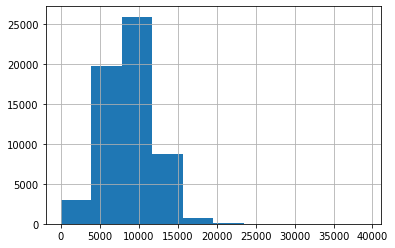

In [17]:
df['MMRCurrentRetailAveragePrice'].hist()
plt.show()

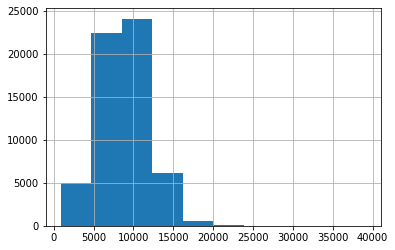

In [18]:
#Missing values prezzi MMRA + istogramma
df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].replace(0, np.nan)
df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].replace(1, np.nan)

df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))
df['MMRCurrentRetailAveragePrice'] = df['MMRCurrentRetailAveragePrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentRetailAveragePrice'].hist()
plt.show()

In [19]:
#Missing values prezzi MMRA
#REPLACE MISSING VALUES & OUTLIERS in un colpo solo...
#Rimpiazzo gli 0 e 1 dei valori di MMR con np.nan e poi rimpiazzo con la media fatta rispetto a, dapprima Make, Model e SubModel
#(di cui se ne trovano la maggior parte), poi Make e Model, e poi Make per i pochi rimasti
df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].replace(0, np.nan)
df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].replace(1, np.nan)

df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].replace(0, np.nan)
df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].replace(1, np.nan)

df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].replace(0, np.nan)
df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].replace(1, np.nan)

df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].replace(0, np.nan)
df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].replace(1, np.nan)

df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].replace(0, np.nan)
df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].replace(1, np.nan)

df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------
df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].replace(0, np.nan)
df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].replace(1, np.nan)

df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------

#----------------------------------------------------------------------------------------------------------
df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].replace(0, np.nan)
df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].replace(1, np.nan)

df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].groupby([
    df['Make'], df['Model'], df['SubModel']]).apply(lambda x: x.fillna(
    x.mean()))
#----------------------------------------------------------------------------------------------------------

df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitionAuctionAveragePrice'] = df['MMRAcquisitionAuctionAveragePrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitionAuctionCleanPrice'] = df['MMRAcquisitionAuctionCleanPrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitionRetailAveragePrice'] = df['MMRAcquisitionRetailAveragePrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRAcquisitonRetailCleanPrice'] = df['MMRAcquisitonRetailCleanPrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentAuctionAveragePrice'] = df['MMRCurrentAuctionAveragePrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentAuctionCleanPrice'] = df['MMRCurrentAuctionCleanPrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

df['MMRCurrentRetailCleanPrice'] = df['MMRCurrentRetailCleanPrice'].groupby(
    df['Make']).apply(lambda x: x.fillna(
    x.mean()))

The variables 'Color' and 'SubModel' share the same missing attributes, so we decided to eliminate the rows with these missing values. The same operation is made also for the last missing values from the variables about prices.

In [20]:
#IMPORTANTE: Siccome le righe con valori nulli a Color e SubModel sono gli stessi (e sono solo 7) li togliamo:
df=df.dropna(subset=['SubModel', 'Color']) 


In [21]:
#Rimpiazzati i missing values di Transmission (con la moda fra le macchine dello stesso modello (e stesso Make))
df['Transmission'] = df['Transmission'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mode()[0]))

In [22]:
#Convertito la colonna Trim a stringa (c'erano dei valori interi che impedivano di calcolare la moda)
df['Trim']=df['Trim'].astype(str) 
df['Trim'] = df['Trim'].replace('nan', np.nan)
#Rimpiazzato i missing values della colonna Trim con la moda calcolata fra Veicoli con stesso Make, Model e SubModel (molto precisa)
df['Trim'] = df.groupby(['Make','Model', 'SubModel']).Trim.apply(
    lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)
df['Trim'] = df.groupby(['Make','Model']).Trim.apply(
    lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)
df['Trim'] = df.groupby('Make').Trim.apply(
    lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)


In [23]:
#Rimpiazzato i missing values della colonna WheelType con la moda calcolata fra Veicoli con stesso Make Model (molto precisa)
df['WheelType']=df['WheelType'].astype(str) 
df['WheelType'] = df['WheelType'].replace('nan', np.nan)
#Rimpiazzato i missing values della colonna WheelType con la moda calcolata fra Veicoli con stesso Make, Model e SubModel (molto precisa)
df['WheelType'] = df.groupby(['Make','Model','SubModel']).WheelType.apply(
    lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)
df['WheelType'] = df.groupby(['Make','Size']).WheelType.apply(
    lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)
df['WheelType'] = df.groupby('Make').WheelType.apply(
    lambda x: x.fillna(np.nan if x.isnull().all() else x.value_counts().index[0])
)

The two variables "PRIMEUNIT" and "AUCGUART" have the 95.4% of the attributes that are null, so it is reasonable to delete this features from the dataset because they are not useful for the study.

In [24]:
#eliminare Primeunit e Aucguart
df = df.drop(['PRIMEUNIT', 'AUCGUART'], axis=1)

In [25]:
df=df.dropna(subset=['Size', 'Trim'])

In [26]:
#Outlier: c'e' un valore di VehBCost uguale a 1. Lo trattiamo come un outlier sostituendolo con la media fatta raggruppando su Make e Model
df['VehBCost'] = df['VehBCost'].replace(1, np.nan)
df['VehBCost'] = df['VehBCost'].groupby([
    df['Make'], df['Model']]).apply(lambda x: x.fillna(
    x.mean()))

To check if there are any missing value left in the table below we show that the sum of the missing values is zero in every variables except for WheelTypeID that we will 

In [27]:
df.isnull().sum()

RefId                                   0
IsBadBuy                                0
PurchDate                               0
Auction                                 0
VehYear                                 0
VehicleAge                              0
Make                                    0
Model                                   0
Trim                                    0
SubModel                                0
Color                                   0
Transmission                            0
WheelTypeID                          2566
WheelType                               0
VehOdo                                  0
Nationality                             0
Size                                    0
TopThreeAmericanName                    0
MMRAcquisitionAuctionAveragePrice       0
MMRAcquisitionAuctionCleanPrice         0
MMRAcquisitionRetailAveragePrice        0
MMRAcquisitonRetailCleanPrice           0
MMRCurrentAuctionAveragePrice           0
MMRCurrentAuctionCleanPrice       

In [28]:
#Variables transformations

In [29]:
df = df.drop(['BYRNO', 'RefId','WheelTypeID'], axis=1)

In [30]:
#In variable transformations aggiungerei la colonna miles_per_year e toglierei per contare il chilometraggio all'anno 
#Toglierei VehYear tanto sappiamo VehicleAge

In [31]:
df['Miles_Per_Year'] = df['VehOdo'] / df['VehicleAge']
df['Miles_Per_Year']

0        30592.000000
1        30794.333333
2        22982.500000
3        20042.250000
4        19343.000000
             ...     
58381    26075.333333
58382    17792.250000
58383    23265.000000
58384    17065.200000
58385     9164.625000
Name: Miles_Per_Year, Length: 58374, dtype: float64

In [32]:
df['Transmission'].value_counts()

AUTO      56326
MANUAL     2047
Manual        1
Name: Transmission, dtype: int64

In [33]:
df[df['Transmission']=='Manual']['Transmission']


6895    Manual
Name: Transmission, dtype: object

In [34]:
df.loc[6895,'Transmission']='MANUAL'


In [35]:
df['Transmission'].value_counts()

AUTO      56326
MANUAL     2048
Name: Transmission, dtype: int64

*Correlation between variables*



In [36]:
corr_matrix = df.corr()
df.corr()

,IsBadBuy,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost,Miles_Per_Year
IsBadBuy,1.000000,-0.156879,0.165275,0.082829,-0.108971,-0.102839,-0.087310,-0.083842,-0.108561,-0.103714,-0.103894,-0.100574,0.006376,-0.098015,-0.003974,0.050224,-0.110067
VehYear,-0.156879,1.000000,-0.958042,-0.283521,0.602922,0.556068,0.606735,0.566663,0.600681,0.558930,0.611732,0.572942,0.070000,0.349516,0.057322,-0.267593,0.743642
VehicleAge,0.165275,-0.958042,1.000000,0.318749,-0.587780,-0.542411,-0.481658,-0.448599,-0.589565,-0.547475,-0.519312,-0.485806,-0.076643,-0.311749,-0.024665,0.257881,-0.774093
VehOdo,0.082829,-0.283521,0.318749,1.000000,-0.018537,0.025446,0.031257,0.065611,-0.030969,0.010978,0.014708,0.048267,-0.053609,-0.064305,0.031001,0.411220,0.043420
MMRAcquisitionAuctionAveragePrice,-0.108971,0.602922,-0.587780,-0.018537,1.000000,0.989734,0.902995,0.902819,0.952922,0.946701,0.886387,0.885067,0.047067,0.821467,0.037296,-0.048674,0.538466
MMRAcquisitionAuctionCleanPrice,-0.102839,0.556068,-0.542411,0.025446,0.989734,1.000000,0.893474,0.910099,0.941145,0.949567,0.877293,0.887854,0.041706,0.818882,0.037197,-0.017335,0.491170
MMRAcquisitionRetailAveragePrice,-0.087310,0.606735,-0.481658,0.031257,0.902995,0.893474,1.000000,0.989452,0.863120,0.859405,0.933145,0.924729,0.036144,0.781549,0.081130,-0.053894,0.449460
MMRAcquisitonRetailCleanPrice,-0.083842,0.566663,-0.448599,0.065611,0.902819,0.910099,0.989452,1.000000,0.861080,0.869058,0.925876,0.928741,0.031734,0.786571,0.078345,-0.025775,0.415213
MMRCurrentAuctionAveragePrice,-0.108561,0.600681,-0.589565,-0.030969,0.952922,0.941145,0.863120,0.861080,1.000000,0.989971,0.911024,0.908344,0.051946,0.794036,0.037252,-0.050641,0.536714
MMRCurrentAuctionCleanPrice,-0.103714,0.558930,-0.547475,0.010978,0.946701,0.949567,0.859405,0.869058,0.989971,1.000000,0.903452,0.917154,0.046587,0.793736,0.037645,-0.021093,0.493296


In [37]:
corr_matrix['IsBadBuy'].sort_values(ascending=False)
#Mostriamo solo la colonna di correlazione di IsBadBuy perchè è quello su cui dobbiamo fare classificazione

IsBadBuy                             1.000000
VehicleAge                           0.165275
VehOdo                               0.082829
WarrantyCost                         0.050224
VNZIP1                               0.006376
IsOnlineSale                        -0.003974
MMRAcquisitonRetailCleanPrice       -0.083842
MMRAcquisitionRetailAveragePrice    -0.087310
VehBCost                            -0.098015
MMRCurrentRetailCleanPrice          -0.100574
MMRAcquisitionAuctionCleanPrice     -0.102839
MMRCurrentAuctionCleanPrice         -0.103714
MMRCurrentRetailAveragePrice        -0.103894
MMRCurrentAuctionAveragePrice       -0.108561
MMRAcquisitionAuctionAveragePrice   -0.108971
Miles_Per_Year                      -0.110067
VehYear                             -0.156879
Name: IsBadBuy, dtype: float64

CLUSTERING

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler.fit(df.head().values)
scaler.transform(df.head().values)

In [38]:
classes = df['IsBadBuy']  #classe da predire
del df['IsBadBuy']
df.head()

,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,...,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,Miles_Per_Year
0,10/25/2010,ADESA,2008,2,KIA,SPECTRA,EX,4D SEDAN EX,BLUE,AUTO,...,6628.0,7535.0,9605.0,10650.0,33619,FL,6100.0,0,533,30592.000000
1,5/27/2009,MANHEIM,2006,3,DODGE,STRATUS V6 2.7L V6 M,SXT,4D SEDAN SXT FFV,SILVER,AUTO,...,5480.0,6461.0,6418.0,7478.0,32124,FL,4000.0,0,1630,30794.333333
2,3/18/2010,OTHER,2008,2,DODGE,CALIBER,SE,4D WAGON,BLACK,AUTO,...,7497.0,8102.0,10721.0,11350.0,74135,OK,7500.0,0,693,22982.500000
3,6/8/2009,OTHER,2005,4,FORD,FREESTAR FWD V6 3.9L,S,PASSENGER 3.9L,BROWN,AUTO,...,4817.0,6658.0,5702.0,7691.0,85018,AZ,4725.0,0,1633,20042.250000
4,3/4/2009,MANHEIM,2005,4,CHRYSLER,TOWN & COUNTRY FWD V,Bas,MINIVAN 3.3L,BLUE,AUTO,...,5370.0,6811.0,6300.0,7856.0,75236,TX,5670.0,0,1623,19343.000000


In [ ]:
del df['PurchDate']
del df['SubModel'] #son troppi
del df['Model']
del df['Nationality']
del df['TopThreeAmericanName']
del df['VNST']
del df['Color']

#Trim, Auction, Make, Size, Transmission le trasformiamo in numeri.
#WheelType e' da sostituire con WheelTypeID.

df['Trim'] = df['Trim'].astype('category')

df['Auction'] = df['Auction'].astype('category')

df['Make'] = df['Make'].astype('category')

df['Size'] = df['Size'].astype('category')

df['Transmission'] = df['Transmission'].astype('category')

df['WheelType'] = df['WheelType'].astype('category')

cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

Knee Method to estimate the best K

In [ ]:
sse_list = list()
max_k = 15
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)